In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/cancer/data.csv')

# Use only 2 features for 2D visualization
X = df[['radius_mean', 'texture_mean']].values
y = df['diagnosis'].map({'M': 1, 'B': 0}).values  # M = Malignant (1), B = Benign (0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train linear SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Train RBF SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

# Test accuracy
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test)))
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test)))


Linear SVM Accuracy: 0.9035087719298246
RBF SVM Accuracy: 0.9210526315789473


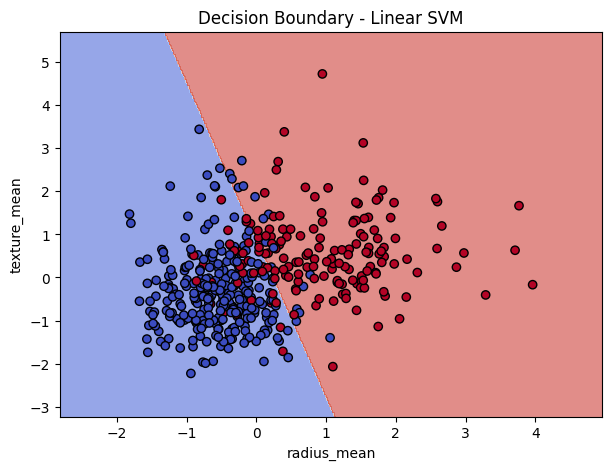

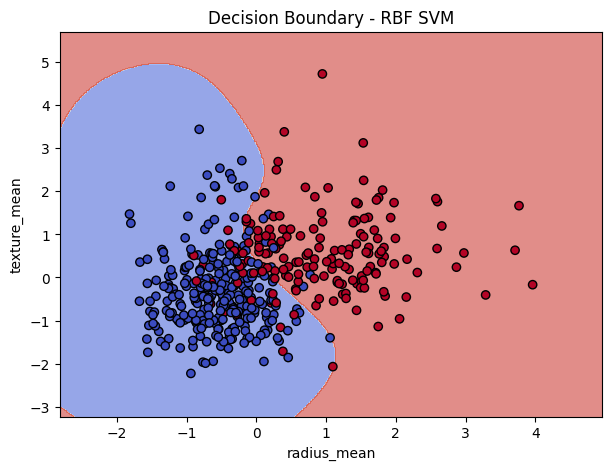

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, title):
    h = .02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("radius_mean")
    plt.ylabel("texture_mean")
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, "Decision Boundary - Linear SVM")
plot_decision_boundary(svm_rbf, "Decision Boundary - RBF SVM")


In [9]:
from sklearn.model_selection import GridSearchCV

# Define grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
grid.fit(X_train, y_train)

print("Best Parameters (RBF):", grid.best_params_)


Best Parameters (RBF): {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the best model
y_pred = grid.predict(X_test)

print("Test Accuracy with Tuned RBF SVM:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy with Tuned RBF SVM: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[66  5]
 [ 5 38]]
